<a href="https://colab.research.google.com/github/FishStalkers/tutorials/blob/main/Copy_of_MLTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **What is Machine Learning?**


Machine learning is an exciting subfield of artificial intelligence that takes inputted data into a chosen machine learning algorithm to compare the predicted and actual result. As more data is fed into the algorithm, it "learns" over time and becomes more accurate with more given data. 

# **Three Types of Machine Learning**

# Supervised Learning

Supervised learning is a type of learning where two different types of data with a known result are input into a chosen machine learning algorithm. These two different types of data are called target variables, the variables you want to predict, and features, which are the variable that predict the target variable. We can liken this to a graph in 2-d where the x-axis contains independent variables that affect the result of the dependent measured variable on the y-axis. However, in real life, there can be far more features than just one. Because supervised learning has a given result, we can map inputs to outputs using our algorithm. Using this, we can train models with enough data and finetiune our algorithm so that it reaches an eacceptable level of accuracy. 

There are two types of supervised learning problems: classification problems and regression problems. Classification problems identify items within a specific category, while regression problems use past values to predict future values. 

# Unsupervised Learning

Unsupervised learning is different from supervised learning in that there are no target variables identified, and we only have input variables without any other information. Unsupervised learning then deals with using an algorhtm that learns by itself and finds patterns in the data. 

There are two types of unsupervised learning problems: clustering problems and assosciation problems. Clustering groups data based on shared characteristics, while association finds rules that control how data is asosciated. 

# Reinforcement Learning

Reinforcement learning is a method of machine learning training where desired algorithm behaviors are rewarded and undesired algorithm behaviors are punished in order to achieve a certain learning outcome. 

# Scikit-Learn
We'll now begin our exploration of the scikit-learn python library. This is a popular machine learning library that features various calssification, regression, and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means and DVSCAN. By using libraries with prebuilt methods and algorithms, we're able to cut out much of the math behind creating models and the machine learning.

We'll first need to install sci-kit learn using:

In [14]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Linear Regression
Linear regression is perhaps the most simple model that we will create where a linear equation is fitted to a data set of independent and dependent variables.

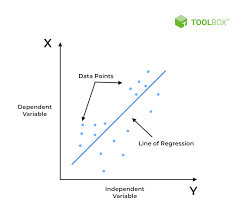

### Train Test Split
Once we build a model based off of some data set, we'll want some way of measuring its performance. To do this, we'll utilize the train-test-split tool where the data set is split into two separate data sets (generally split 70-30 training, testing). The testing data set will be used to create our model and we'll later test this model off of the training data we've saved from earlier. 

We'll need to import both the LinearRegression and train_test_split tool (along with all our other libraries/dataset) to begin building models:

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [16]:
#We'll be using the Fish dataset to create some models

fish = pd.read_csv('C:/Users/palliyilp/VIP/Fish.csv')


FileNotFoundError: ignored

It's great to check out the data we're working with and it's also common practice to check out the basic statistics. We'll use
- fish.head()
- fish.describe()
- fish.info()

We'll also be creating some plots to get more visual data
- sns.pairplot()
- sns.distplot()

In [ ]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


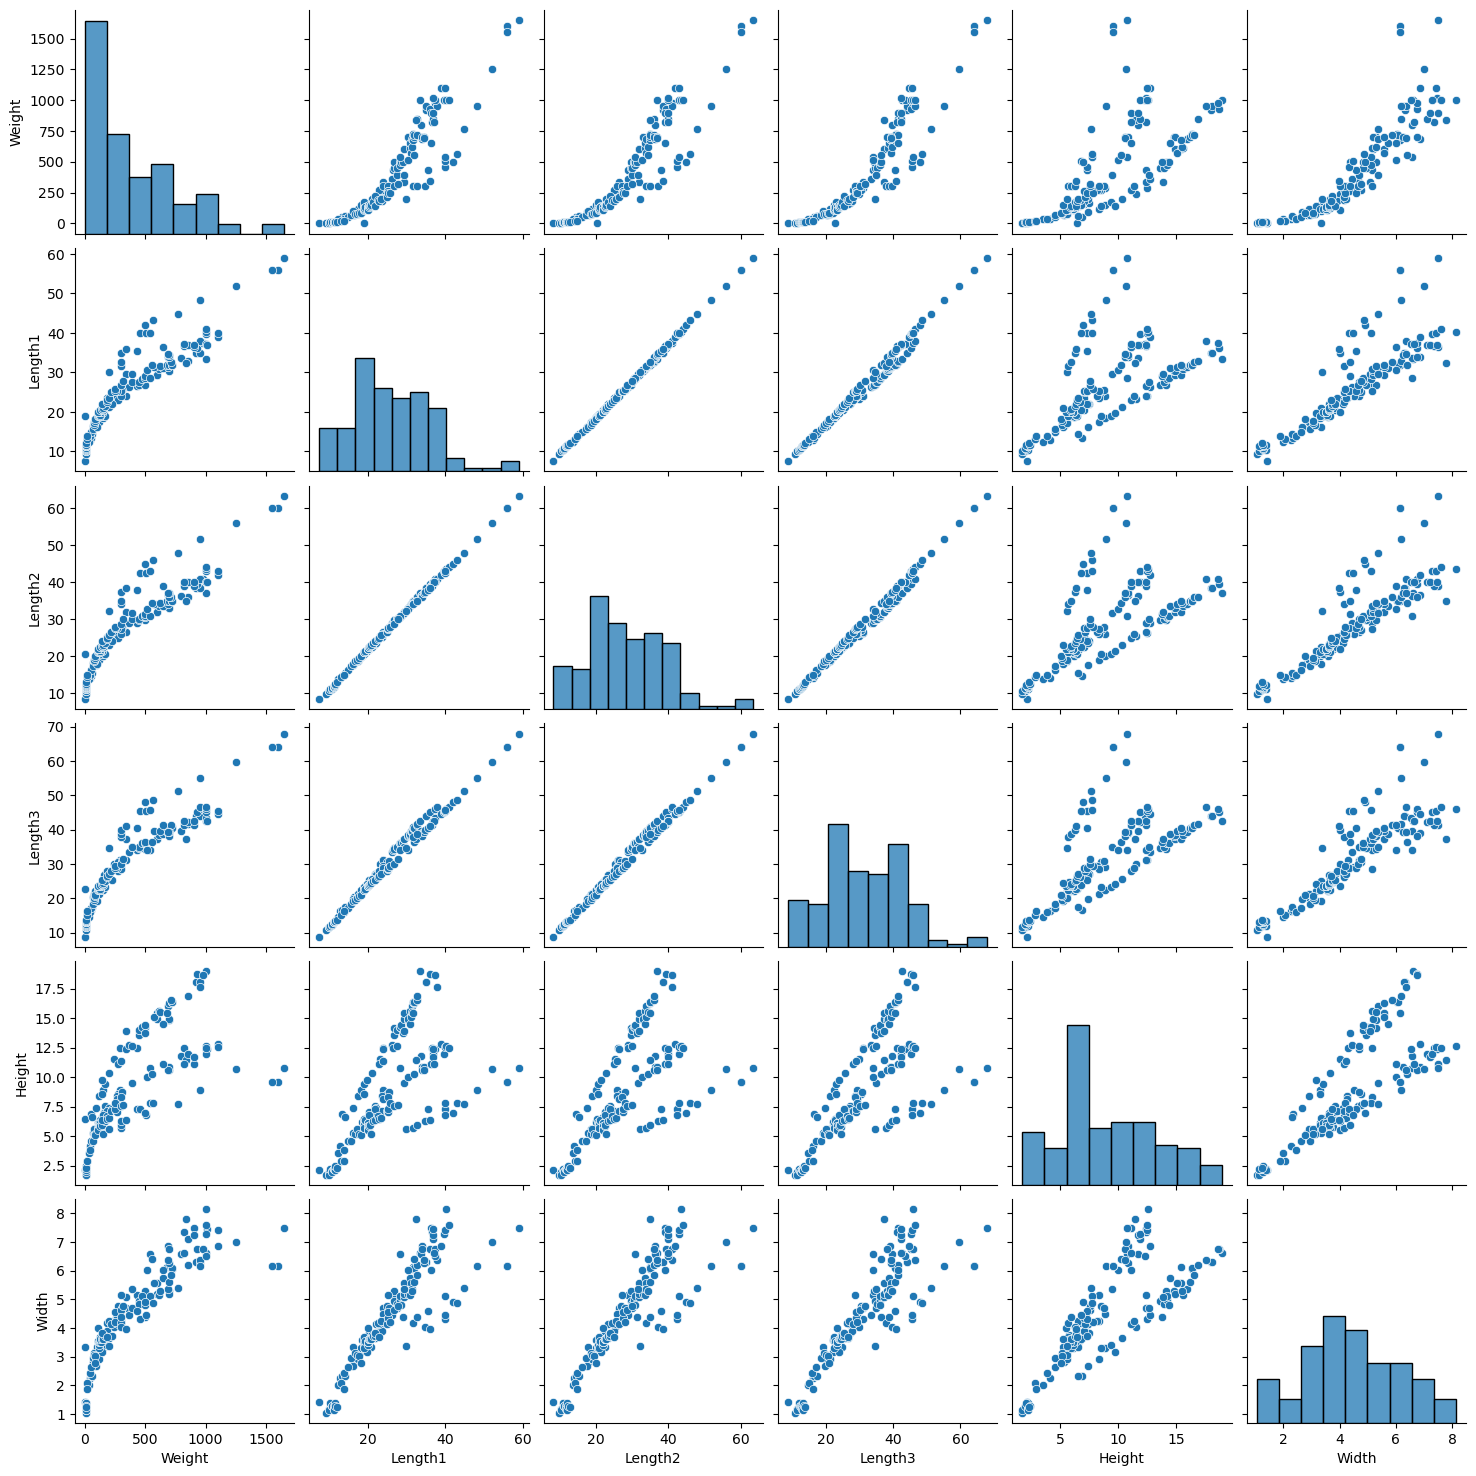

In [ ]:
sns.pairplot(fish)

C:\Users\edwar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

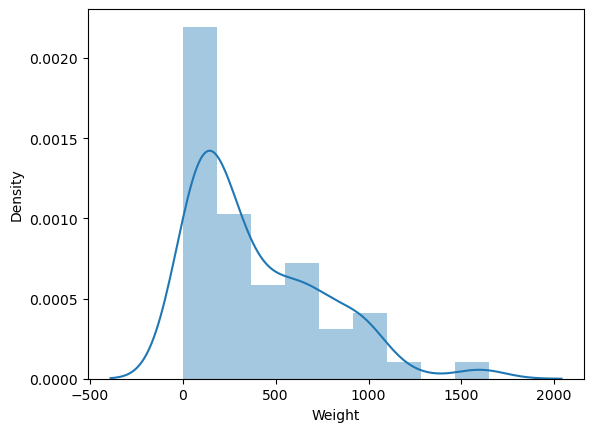

In [ ]:
sns.distplot(fish['Weight'])

## Training a Linear Regression Model
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Weight column. We will toss out the Species column because it only has text info that the linear regression model can't use.

In [ ]:
x = fish[['Length1','Length2', 'Length3', 'Height', 'Width']]
y = fish['Weight']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [ ]:
#Creating a table for coefficients
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Length1,61.657759
Length2,-8.682474
Length3,-28.063712
Height,22.933112
Width,42.631380


The table above shows Coefficients for each variable taken into account and given that each other variable is held constant, they can be interpreted as: 
- A 1 unit increase in Length1 results in an increase in 61.66 in weight
- A 1 unit increase in Length2 resutls in an increase in -8.68 in weight
- A 1 unit increase in Length3 resutls in an increase in -28.06 in weight
- A 1 unit increase in Height results in an increase in 22.93 in weight
- A 1 unit increase in Width results in an increase in 42.63 in weight

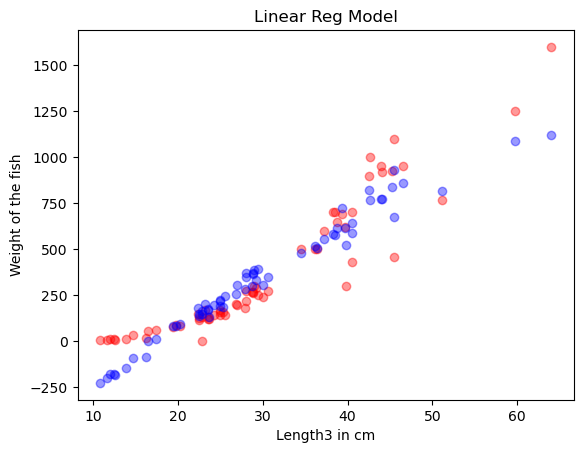

In [ ]:
# Graphical representation of Test data vs Predicted data - Length3

y_pred = lm.predict(X_test)
plt.scatter(X_test['Length3'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['Length3'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Length3 in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Reg Model');

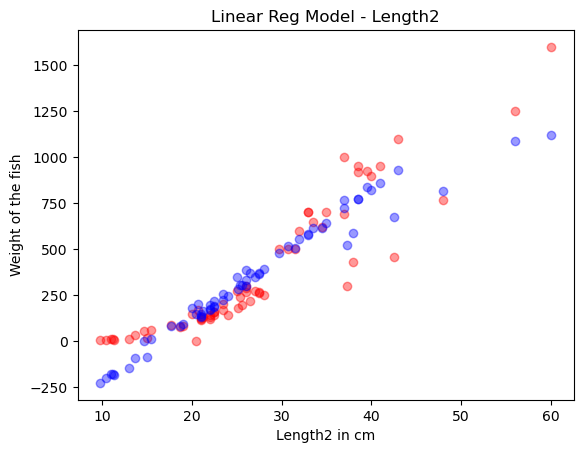

In [ ]:
plt.scatter(X_test['Length2'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['Length2'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Length2 in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Reg Model - Length2');

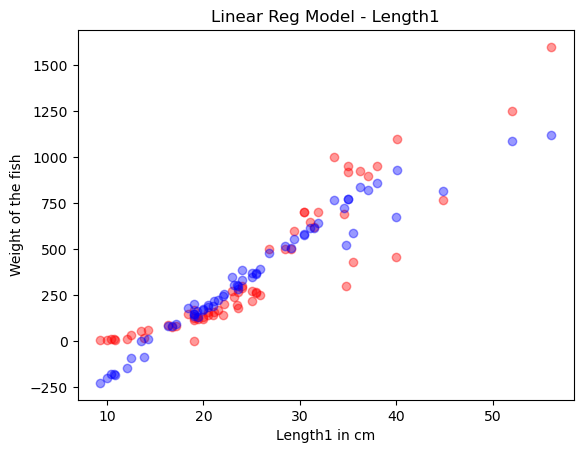

In [ ]:
plt.scatter(X_test['Length1'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['Length1'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Length1 in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Reg Model - Length1');

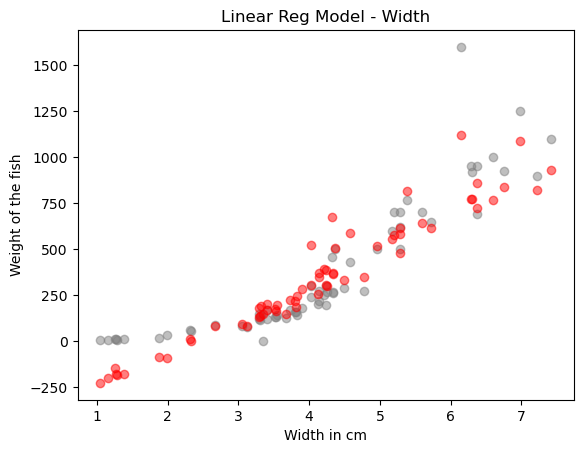

In [ ]:
plt.scatter(X_test['Width'], y_test, color='gray', alpha=0.5)
plt.scatter(X_test['Width'], y_pred, color='red', alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Reg Model - Width');

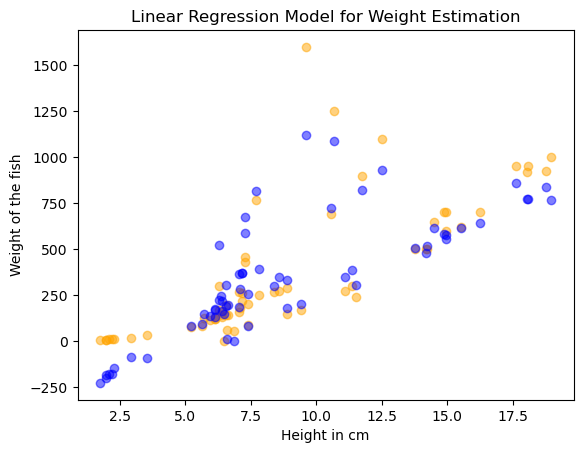

In [ ]:
plt.scatter(X_test['Height'], y_test, color='orange', alpha=0.5)
plt.scatter(X_test['Height'], y_pred, color='blue', alpha=0.5)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

- Need to use some more example data set
- Maybe talk about Logistic Regression
- Talk about K-means clustering or some other clustering
- Confusion Matrix
- (sorry i was pretty sick over the weekend)



-back forward propagation, cross entropy loss, softmax activation?

# **Confusion Matrix**

In our classification problems, we can show the accuracy of our classification results by displaying the results in a convenient 2x2 matrix called a confusion matrix, which maps out the true negatives, true positives, false negatives, and false positives. Here is a chart provided by Data School.

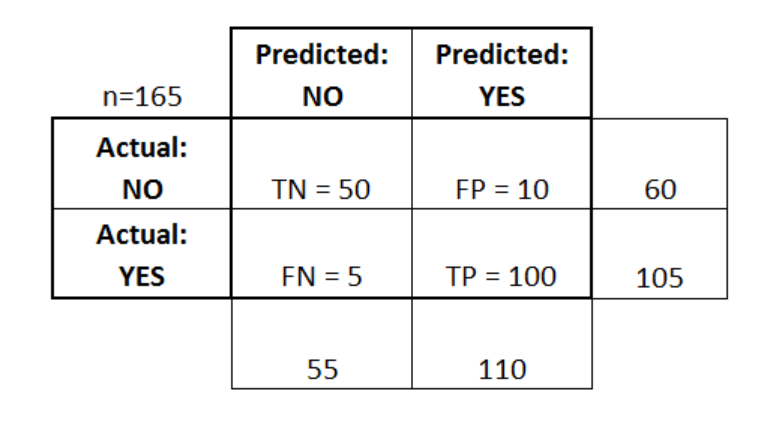

Let's go ahead and use this concept to see how accurate the classifier we built was.

# **K-Means Clustering**


K-Means clustering is an algorithm that randomly selects k number of centroids, k  being the number of clusters you choose to group by and centroids being the central data point of one of your clusters. The algorithm employs a concepts known as expectation-maximization hwere each data point is assigned to its closest centroid. After assigning the points based on the closest centroid, the position of the centroid is recalculated by taking the mean of all the points in the cluster. Here is a chart courtesy of Real Python that concisely summarizes the algorithm. 

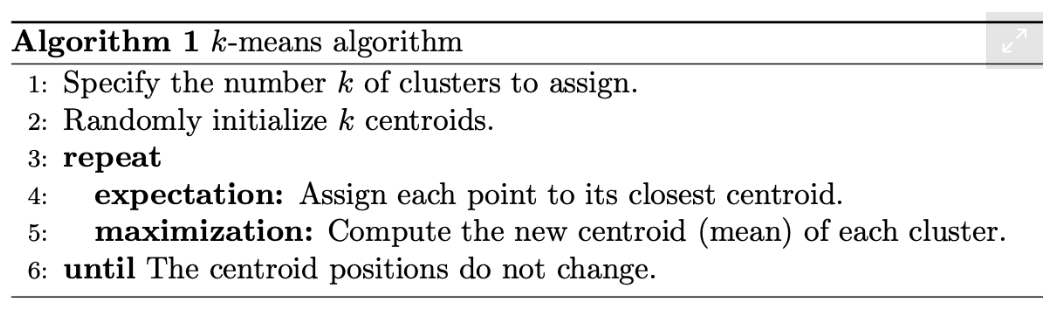




The algorithm ends when the positon of the centroids don't change after an iteration. This is known as centroid convergence. We can test how well our cluster creation was done by calculating the sum of the squared error (SSE) after the centroids converge, which is calculated by summing the squares of the Euclidean distances from each point to the closest centroid. 


Another note about this algorithm is that it is non-deterministic, meaning different trials will yield different results, i.e. different clusters. Because of this, we use the trial with the least amoung of error as our final result. 

**K-Means Example**

Now, let's look at a sample dataset to practice with. We will look at the TCGA Cancer Gene Expression dataset to cluster different expressions into their cancer type. This gene expression code and example is courtesy of Real Python. We start by first installing all our required dependencies. Because our dataset is stored online in a TAR archive file in the UC Irvine Machine Learning Repository and is most easily read from a url, we need to import tarfile and urllib. Additionally, like our previous example with regression, we wil be using scikit learn dependencies, the specifics of which we will cover later in the tutorial. 

In [20]:
import tarfile
import urllib

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [21]:
uci_tcga_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
)
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

# download the file
r = urllib.request.urlretrieve(full_download_url, archive_name)

# extract the data from the archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

**Dataset Basics and Conversion Process**


There are two different files in the dataset, the data csv file and the labels csv file. The data csv files contains 5 different cancer types, with 881 recorded samples and gene expression values for over 20,531 different gene expressions. 


As the KMeans class is skicit-learn requires a numpy array as an input, we must convert the txt file values into a valid numpy array. Luckily, Numpy has a function called genfromtxt which helps us do this easily. 


In [22]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"

data = np.genfromtxt(
    datafile, delimiter=",", usecols=range(1, 20532), skip_header=1
)

true_label_names = np.genfromtxt(
    labels_file, delimiter=",", usecols=(1,), skip_header=1, dtype=str
)

Now that we have converted the contents into a valid numpy array, let's use some NumPy slicing to view our data. 

In [23]:
data[:5, :3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [24]:
true_label_names[:5]

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

The label abbreviations are as follows:

**BRCA:** Breast invasive carcinoma

**COAD:** Colon adenocarcinoma

**KIRC:** Kidney renal clear cell carcinoma

**LUAD:** Lung adenocarcinoma

**PRAD:** Prostate adenocarcinoma


We can encode these using numerical values through a label encoder using scikitlearn.

In [25]:

label_encoder = LabelEncoder()

In [26]:
true_labels = label_encoder.fit_transform(true_label_names)

In [27]:
true_labels[:5]

array([4, 3, 4, 4, 0])

Now that our data has been encoded with the new labels, we can see the original labels by calling the .classes_ method. These 5 classes will be the base number for our clusters. Let's go ahead and apply this. 

In [28]:
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

In [29]:
n_clusters = len(label_encoder.classes_)

Currently, we have over 20,000 different gene expression to look at in our sample. However, this makes it hard to characterize data for our models, so a way of reducing these values into something smaller is very useful and necessary. We call this dimensionality reduction and we use the core principles in linear algebra to reduce the fatures in our dataset to better run our models. 

**PCA**

One technique for dimensionality reduction is Principle Component Analysis, or PCA. PCA takes our input features and projects these into a smaller dimension of features. These reduced feature dimensions are called components. We can use PCA by building a preprocessing pipeline to convert our data into a form our model can run. We also need to scale our data in a way that is simple for a computer to interpret and ensures proportionality. This is called feature scaling, and allows our values to be bounded between a certain range, typically between 0 and 1 or -1 and 1. We will use a type of feature scaler in the scikitlearn library called the MinMax scaler and also reduce our sample features to 2 components using PCA. 

In [30]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

Great! Now we can build another pipeline for our k-means clustering to actually cluster our transformed data. Typically, we assign centroids randomly, but in our case, we will use "k-means++", which will ensure centroids have some distance between them on initialization, which is a slight improvement on random initialization. The parameter n_init sets the number of times we run the algorithm with different initialized centroid seeds to find the best output. The parameter max_iter specifies the maximum amount of iterations of the k-means algorithm that occurs in a single run. The random state parameter determines the random number generation for centroid initialization. By setting the parameter to an integer value, we can make this randomness deterministic, or control the randomness of our function calls. 

In [31]:
clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                n_clusters=n_clusters,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42,
            ),
        ),
    ]
)

Finally, we chain these two pipelines and fit these steps onto the data. 

In [32]:
pipe = Pipeline([("preprocessor", preprocessor), ("clusterer", clusterer)])

In [33]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

We can measure our model using what's known as a silhouette coefficient. This is a value between -1 and 1 which calcualtes how well the data is fit to predicted values, with -1 being complete inaccuracy and 1 being perfect accuracy. 

In [34]:
preprocessed_data = pipe["preprocessor"].transform(data)

In [35]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [36]:
silhouette_score(preprocessed_data, predicted_labels)

0.5118775528450306

In [37]:
adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

We can visualize the k-means clustering results using pandas and seaborn. 

In [38]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

In [39]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title("Clustering results from TCGA Pan-Cancer\nGene Expression Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

TypeError: ignored

<Figure size 800x800 with 0 Axes>

In [41]:
# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(data)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(data),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        true_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

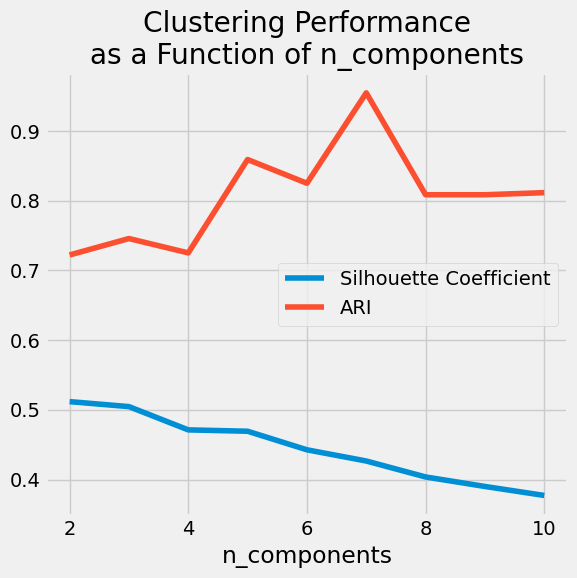

In [42]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance\nas a Function of n_components")
plt.tight_layout()
plt.show()